<a href="https://colab.research.google.com/github/Jhon-Fredy-Hernandez-Martinez/Regresion-Lineal/blob/main/GeoPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:

#importando librerias
!pip install mapclassify
!pip install pandas

import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import shapely as shp
import pandas as pd
import os
import mapclassify

In [34]:

print(gpd.__version__)

0.13.2


In [22]:
ruta_municipios = "C:/Users/usuario/Documents/Bootcam Análisis de Datos Talento TECH/Misión 2 Ht/TallerGeopandas/Datasets/Servicios_P%C3%BAblicos_-_Municipios.geojson"
ruta_precios = r"C:\Users\usuario\Documents\Bootcam Análisis de Datos Talento TECH\Misión 2 Ht\TallerGeopandas\Datasets\Precios_Combustibles__2017-1__20240401.csv"

In [36]:
#permiso para acceder a drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [40]:
!ls '/content/drive/My Drive/TalentoTECH'

Precios_Combustibles__2017-1__20240401.csv  Servicios_P%C3%BAblicos_-_Municipios.geojson


In [41]:
# Cargo el archivo CSV de precios de combustibles
ruta_precios_combustible = '/content/drive/My Drive/TalentoTECH/Precios_Combustibles__2017-1__20240401.csv'
precios = pd.read_csv(ruta_precios_combustible)

# Cargo el archivo GeoJSON de los municipios
ruta_archivo_municipios = '/content/drive/My Drive/TalentoTECH/Servicios_P%C3%BAblicos_-_Municipios.geojson'
shapes = gpd.read_file(ruta_archivo_municipios)


In [42]:
precios.head()

,departamentocodigo,departamentonombre,municipiocodigo,municipionombre,agente,bandera,direccion,producto,precio,estado,fecharegistro
0,18,CAQUETA,18756,SOLANO,COMERCIALIZADORA EL HUECO,TERPEL,Puerto Principal,BIODIESEL EXTRA,8500,1,01/08/2015 12:00:00 AM
1,99,VICHADA,99624,SANTA ROSALIA,ESTACION DE SERVICIO LA VICTORIA,BRIO,Carrera 9 con calle 3 No. 08-92-96,BIODIESEL EXTRA,9000,1,01/08/2016 12:00:00 AM
2,25,CUNDINAMARCA,25175,CHIA,COMERCIAL SANTA INES LIMITADA EN LIQUIDACION,TERPEL,CARRERA 1 No. 6A-60,GASOLINA CORRIENTE OXIGENADA,8060,1,01/04/2017 12:00:00 AM
3,5,ANTIOQUIA,5837,TURBO,BOMBA CODI EL PUEBLO,PROXXON,CRA 13 99 A 41,BIODIESEL EXTRA,8893,1,05/07/2018 12:00:00 AM
4,47,MAGDALENA,47605,REMOLINO,ESTACION DE SERVICIOS LA RUTA,ECOS,FINCA EL CHORY ENTRADA A REMOLINO EN REMOLINO,BIODIESEL EXTRA,7500,1,01/28/2017 12:00:00 AM


<Axes: >

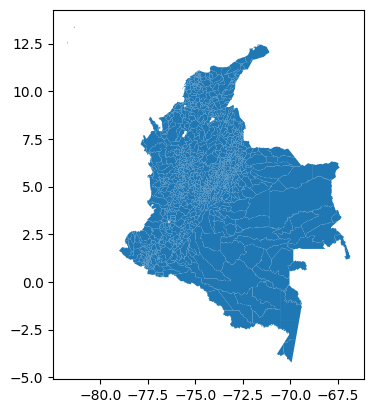

In [43]:
shapes.plot()

In [44]:
#listar productos para escoger uno

precios["producto"].unique()
precios_gasolina = precios[precios["producto"] == "GASOLINA CORRIENTE OXIGENADA"]  #FILTRO POR PRODUCTO
print(len(precios_gasolina))
precios_gasolina.head()

5291


,departamentocodigo,departamentonombre,municipiocodigo,municipionombre,agente,bandera,direccion,producto,precio,estado,fecharegistro
2,25,CUNDINAMARCA,25175,CHIA,COMERCIAL SANTA INES LIMITADA EN LIQUIDACION,TERPEL,CARRERA 1 No. 6A-60,GASOLINA CORRIENTE OXIGENADA,8060,1,01/04/2017 12:00:00 AM
5,68,SANTANDER,68235,EL CARMEN DE CHUCURI,ESTACION DE SERVICIO EL PORVENIR CARMEN DE CHU...,TERPEL,CORREGIMIENTO EL CENTENARIO,GASOLINA CORRIENTE OXIGENADA,9080,1,01/22/2015 12:00:00 AM
7,47,MAGDALENA,47605,REMOLINO,ESTACION DE SERVICIOS LA RUTA,ECOS,FINCA EL CHORY ENTRADA A REMOLINO EN REMOLINO,GASOLINA CORRIENTE OXIGENADA,8300,1,01/28/2017 12:00:00 AM
8,95,GUAVIARE,95200,MIRAFLORES,ESTACION DE SERVICIO LA ESMERALDA 1,TERPEL,VIA AEROPUERTO PRINCIPAL BARRIO CHINO,GASOLINA CORRIENTE OXIGENADA,10900,1,01/29/2018 12:00:00 AM
12,52,NARIÑO,52256,EL ROSARIO,ESTACION DE SERVICIO AUTOCENTRO ESMERALDAS,BIOMAX,CORREGIMIENTO LA ESMERALDA,GASOLINA CORRIENTE OXIGENADA,6500,1,01/24/2018 12:00:00 AM


Mapa con precios de gasolina agrupasos por cuartiles

In [45]:
precios_agrupados = precios_gasolina.groupby("municipionombre", as_index=False)["precio"].agg(["max"])
precios_mapa = shapes.merge(precios_agrupados, right_on="municipionombre", left_on ="MPIO_CNMBR")


Text(0.5, 1.0, 'Precios de Gasolina 2018')

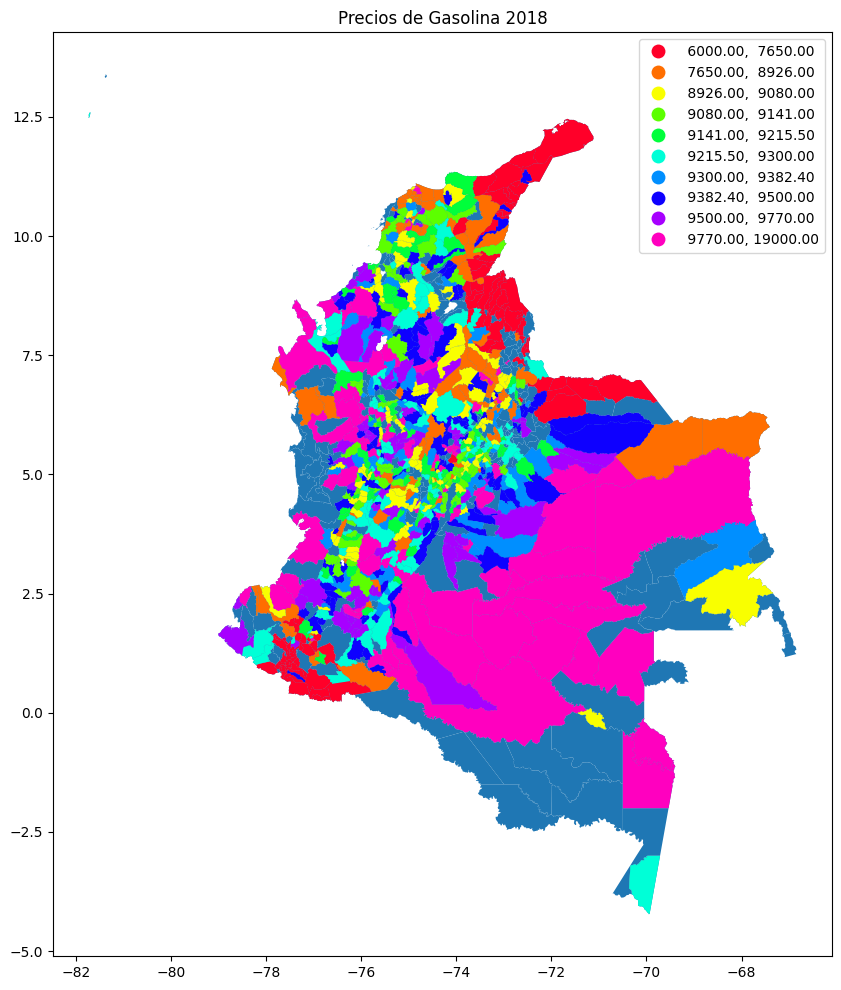

In [46]:
#Dibujar sobre el mapa
axis = shapes["geometry"].plot(figsize=(20,12))
precios_mapa["max"] = precios_mapa["max"].apply(lambda x: int(x))
precios_mapa.plot(column= "max", ax=axis, legend=True, scheme="Quantiles", k=10, cmap="gist_rainbow")
axis.set_title("Precios de Gasolina 2018")
